# Titanic: Machine Learning from Disaster
## Bèta excellent vrije opdracht
### Revius Lyceum Doorn
#### Carlo Jacobs 5-03-2019

## Introduction
In this notebook we will be diving into the inner workings of a neural network. We will be creating a machine learning model using python 3 and we will train this model on a dataset I acquired from [this](https://www.kaggle.com/c/titanic) kaggle competition. Kaggle is a free online datascience platform that hosts machine learning competitions with datasets provided by companies or organizations. More information can be found on [the kaggle website](https://www.kaggle.com).

## Requirements
1. A working computer
2. The dataset (download link above)
2. Python3
3. Numpy
4. Pandas
5. Tensorflow
6. Matplotlib

## How does a neural network work?

### The architecture of a neural network

A **neural network** is one of the most popular tools that is used in machine learning today, it can accurately predict things after being trained on a large dataset. A neural network (NN) consists of layers. Each of these layers contain **neurons**. These neurons are associated an activation determined by their inputs and other variables. An NN is based on a collection of these neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal from one neuron to another. A neuron that receives a signal can process it and then signal additional neurons connected to it.

![Neural network](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)

Each neuron has some quantaties associated to it. The input, is given by $$p_j\left(t\right) = \sum_{i} o\left(t\right)_i w_{ij} + w_{0j}.$$ Where,
- $p_j\left(t\right)$ is the input of the neuron.
- $i$ is the index summing over all the predecessor neurons.
- $o_i\left(t\right)$ is the output from neuron's predecessor.
- $w_{ij}$ is the weight associated with the neuron.
- $w_{0j}$ is the bias associated with the neuron.

To each neuron there is associated an activation function $f$ that is dependent on $p_j$. This function maps the neurons input to a value that we call its **activation** $a_j$. Some commonly used activation function are:

- Sigmoid: $f\left(p\right) = \frac{1}{1 + e^{-p}}.$
- ReLU: $f\left(p\right) = \text{max}\left(0, p\right).$
- Hyperbolic tangent: $f\left(p\right) = \tanh \left(p\right).$

### Learing of the network

The NN learns to accurately perform its task by constantly trying to minimize a **cost function**. Given a specific task to solve, and a class of functions $F$, learning means using a set of observations to find $f^{*}\in F$ which solves the task in some optimal sense. This entails defining a cost function $C:F\rightarrow \mathbb {R}$  such that, for the optimal solution $f^{*},  C(f^{*})\leq C(f)\, \forall f\in F$. This can be done by a process called backpropagation. Backpropagation is a method that calculates the gradient of the cost function with respect to the weights in the NN. The weights are then updated according to this gradient. One example of backpropagation is **Stochastic Gradient Descent** and it can be described by the following equation $$w_{ij}\left(t+1\right) = w_{ij}\left(t\right) + \eta \frac{\partial C}{\partial w_{ij}} + \zeta \left(t\right).$$ Where,
- $\eta$ is the learning rate.
- $C$ the cost function.
- $\zeta \left(t\right)$ a stochastic term.

Using the method of backpropagtion, the network can update its weigths to minimize the cost function and get optimal results.

### Adjusting the degrees of freedom of a neural network

This type of neural network has multiple degrees of freedom that can be adjusted in order to increase the performance or accuracy of a neural network. Some examples are
- The learning rate.
- The number of layers in the network.
- The activation function of each layer.
- The cost funciton.
- The sample size of training data.

There is no fixed rulebook on how to set up these parameters. There are only certain estimations that suggest a certain amount of layers or a certain learning rate dependent on (for example) your sample size.

## Importing the requirements

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Reading files
import tensorflow as tf # Machine learning
from tensorflow import keras # Machine learing
import matplotlib.pyplot as plt # Visualizing data
import math # Mathematics

# Making sure matplotlib works
%matplotlib inline

## Analysing the shape of the data

Our data consists of the following columns:
0. **PassengerId**: (int)
1. **Survived**: Survived or Not (int)
2. **Pclass**: Class of Travel 
3. **Name**: Name of Passenger
4. **Sex**: Gender
5. **Age**: Age of Passengers
6. **SibSp**: Number of Sibling/Spouse aboard
7. **Parch**: Number of Parent/Child aboard
8. **Ticket**: Ticket number
9. **Fare**: Price payed by passenger
10. **Cabin**: Cabin number
11. **Embarked**: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

## Loading the data

Here we load the `.csv` into our script using the `pandas` library, this creates a `pandas dataframe` which makes it easy for us to viaulize and manipulate the data. Let's do a quick visualization of our data.

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Reshaping the data

We need to do some reshaping in order to make the data suitable for our neural network.
1. A lot of cabin number are undetermined, so we leave them out.
2. The ticket contains letters, which are hard to parse, so we leave them out.
3. We don't need the name.
4. The sex needs to be converted from "male" and "female" to 0 and 1.
5. The Embarked port needs to be converted from "C", "S" and "Q" to 0, 1 and 2.
6. Remove the passenger id.
7. Removing any NaN's (Not a Number)

After the reshaping of the data, the predicitons of our neural network will be based on:
0. Pclass
1. Sex
2. Age
3. SibSp
4. Parch
5. Fare
6. Embarked

### Converting to a numpy array
In order to manipulate our data we convert it to a numpy array to make it easy to work with.

In [3]:
# Convert to np array
train_data = np.array(train_df)
# We have 891 rows each containing 12 datapoints
train_data.shape

(891, 12)

We can see that we have 891 entries each containing 12 datapoints. We can create a function that will take in our data and reshape it so it is suitable for a neural network.

In [4]:
def reshape_data(data, parameter):
    """Function for reshaping the data"""
    bias = 0
    if parameter == "train":
        pass
    elif parameter == "test":
        bias = -1
    # Convert data
    for i in range(len(data)):
        person = data[i]
        # Convert sex from "male" and "female" to 0 and 1
        if person[4 + bias] == "male":
            data[i][4 + bias] = 0
        elif person[4 + bias] == "female":
            data[i][4 + bias] = 1
        else:
            print("Unidentified sex, changing to male. Index: ", i)
            data[i][4] = 0
        # Convert embarked port from "C", "S" and "Q" to 0, 1 and 2.
        if person[11 + bias] == "C":
            data[i][11 + bias] = 0
        elif person[11 + bias] == "S":
            data[i][11 + bias] = 1
        elif person[11 + bias] == "Q":
            data[i][11 + bias] = 2
        else:
            print("Unidentified port, changing to C. Index: ", i)
            data[i][11 + bias] = 0
    
    # Dropping the name, ticket and cabin column
    data = np.delete(data, [0, 3 + bias, 8 + bias, 10 + bias], 1)
    
    # Remove all NaN's in our dataset and replace them with 0
    for i in range(len(data)):
        for j in range(len(data[i])):
            if np.isnan(data[i][j]):
                data[i][j] = 0
    
    return data

After the reshaping of the data, we get a much more suitable dataset containing only numbers.

In [5]:
train_data = reshape_data(train_data, "train")
pd.DataFrame(train_data)

Unidentified port, changing to C. Index:  61
Unidentified port, changing to C. Index:  829


,0,1,2,3,4,5,6,7
0,0,3,0,22,1,0,7.25,1
1,1,1,1,38,1,0,71.2833,0
2,1,3,1,26,0,0,7.925,1
3,1,1,1,35,1,0,53.1,1
4,0,3,0,35,0,0,8.05,1
5,0,3,0,0,0,0,8.4583,2
6,0,1,0,54,0,0,51.8625,1
7,0,3,0,2,3,1,21.075,1
8,1,3,1,27,0,2,11.1333,1
9,1,2,1,14,1,0,30.0708,0


The new structure of our dataset:
0. **Survived**: Survived or Not (int)
3. **Pclass**: Class of Travel (int)
5. **Sex**: Gender (int)
6. **Age**: Age of Passengers (float)
7. **SibSp**: Number of Sibling/Spouse aboard (int)
8. **Parch**: Number of Parent/Child aboard (int)
10. **Fare**: Price payed by passenger (float)
12. **Embarked**: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown (int)

## Analyzing the data
Using the `matplotlib` libraby we imported above, we can graph, analyze and visualize the dataset.

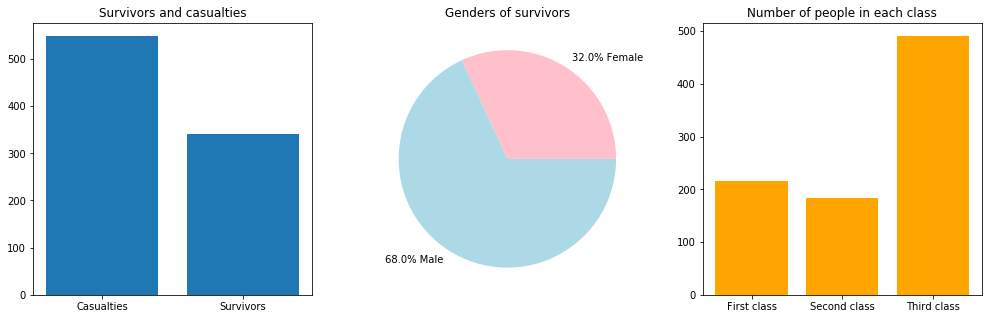

In [6]:
fig = plt.figure(figsize=(17, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the number of the survivors and casualties
unique, counts = np.unique([x[0] for x in train_data], return_counts=True)
ax1.bar([0, 1], [549, 342], align="center")
ax1.set_xticks([0, 1])
ax1.set_title("Survivors and casualties")
ax1.set_xticklabels(("Casualties", "Survivors"))

# Plot the genders of survivors
num_male_survivors = 0
num_female_survivors = 0
num_survivors = 0
for person in train_data:
    if person[0] == 1:
        num_survivors += 1
        if person[2] == 0:
            num_male_survivors += 1
        elif person[2] == 1:
            num_female_survivors += 1

percent_male = np.round(num_male_survivors / num_survivors * 100)
percent_female = np.round(num_female_survivors / num_survivors * 100)
            
ax2.pie([109, 233], labels=[f"{percent_male}% Female", f"{percent_female}% Male"], colors=["pink", "lightblue"])
ax2.set_title("Genders of survivors")

# Plot the number of people in each class
unique, counts = np.unique([x[1] for x in train_data], return_counts=True)
ax3.bar([1, 2, 3], [counts[0], counts[1], counts[2]], align="center", color="orange")
ax3.set_xticks([1, 2, 3])
ax3.set_title("Number of people in each class")
ax3.set_xticklabels(["First class", "Second class", "Third class"])
plt.show()

## Preparing the data for training
We need to split our training data into input and output. The input will be everything except for the 'survived' column. The output will contain only this column. This way, we can train our network to predict wether or not a person on the titanic would have been likely to survive.

In [7]:
def split_training_data(data):
    """Splits training data into input and output"""
    x = []
    y = []
    # Itterate over the data
    for item in data:
        # Add the survivor datapoint to the array
        if item[0] == 0:
            y.append([0, 1])
        else:
            y.append([1, 0])
        item = np.delete(item, 0)
        x.append(item)
    return (np.array(x), np.array(y))

In [8]:
train_x, train_y = split_training_data(train_data)
train_y

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

We can see that we now have two arrays. On with 891 entries of 7 datapoints, this is the input data, and the other with 891 entries of 2 datapoints, this is the output data.

## Building the model
We will be using the [keras](https://keras.io/) library to build our neural network. First, we need to construct a model.

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(445, activation=tf.nn.relu, input_shape=(7,)))
model.add(keras.layers.Dense(100, activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(50, activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

### Layers
This function creates an instance `Sequential` model using the `keras` library built into `tensorflow`. It adds two layers to the model:
1. A `Dense` layer containing 445 neurons with a `ReLU` activation function and an inputshape of 7.
2. A `Dense` layers containing 100 neurons with a `sigmoid` activation function.
2. Another `Dense` layers containing 50 neurons with a `sigmoid` activation function.
3. A `Dense` layer containing 2 neurons with a `Softmax` activation function.

### Dimensions
It is very important that the initial input shape matches the dimensions of the input data, in this case this shape would be 7. It is also important that the number of neurons in the last/output layer of the network matches the dimensions of the output data. In this case 2.

### Activation functions
The ReLU, which we use in the first layer of our network, is an activation function defined as the positive part of its argument:
$$f(x) = max\left(0,x\right)$$

The Softmax activation function, which we use in our second layer, takes an un-normalized vector (in this case the vector form of the second `Dense` layer), and normalizes it into a probability distribution. That is, prior to applying softmax, some vector elements could be negative, or greater than one; and might not sum to 1; but after applying softmax, each element $x_{i}$ is in the interval $\left[0,1\right]$, and $\sum _{i}x_{i}=1.$ The general softmax function is of the form

$$\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}.$$

### Compiling the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [10]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='mse')

## Training the model
We can now train our model using the `train_x` and `train_y` data.

In [11]:
EPOCHS = 30
model.fit(train_x, train_y, epochs=EPOCHS)
print(train_x.shape, train_y.shape)

Train on 891 samples
Epoch 1/30
891/891 [==============================] - 0s 376us/sample - loss: 0.2203
Epoch 2/30
891/891 [==============================] - 0s 83us/sample - loss: 0.2118
Epoch 3/30
891/891 [==============================] - 0s 78us/sample - loss: 0.2102
Epoch 4/30
891/891 [==============================] - 0s 79us/sample - loss: 0.20200s - loss: 0.195
Epoch 5/30
891/891 [==============================] - 0s 78us/sample - loss: 0.1990
Epoch 6/30
891/891 [==============================] - 0s 80us/sample - loss: 0.1900
Epoch 7/30
891/891 [==============================] - 0s 95us/sample - loss: 0.1800
Epoch 8/30
891/891 [==============================] - 0s 78us/sample - loss: 0.1771
Epoch 9/30
891/891 [==============================] - 0s 86us/sample - loss: 0.1720
Epoch 10/30
891/891 [==============================] - 0s 77us/sample - loss: 0.1659
Epoch 11/30
891/891 [==============================] - 0s 74us/sample - loss: 0.1649
Epoch 12/30
891/891 [===============

## Making predictions using the model
We can now use our trained model to make predictions about the **testing data**. We first need to load this data and reshape it as well.

### Loading and reshaping the data

As you can see, we have 418 entries to make predictions on, each containing 11 datapoints. Let's reshape the data.

In [12]:
test_df = pd.read_csv('test.csv')
test_data = np.array(test_df)
test_data = reshape_data(test_data, "test")
pd.DataFrame(test_data)

,0,1,2,3,4,5,6
0,3,0,34.5,0,0,7.8292,2
1,3,1,47,1,0,7,1
2,2,0,62,0,0,9.6875,2
3,3,0,27,0,0,8.6625,1
4,3,1,22,1,1,12.2875,1
5,3,0,14,0,0,9.225,1
6,3,1,30,0,0,7.6292,2
7,2,0,26,1,1,29,1
8,3,1,18,0,0,7.2292,0
9,3,0,21,2,0,24.15,1


We can see that the reshaping worked correctly and that we now have suitable data to make predictions on using our model.

### Making the predictions

In [21]:
print(np.array(test_data[0]).shape)

(7,)


In [13]:
predictions = []
for row in test_data:
    prediction = model.predict(np.array([row]))
    predictions.append(prediction)

### Checking the predictions and calculating the accuracy
Now that we have our predictions ready, we can see how well our model did.

In [14]:
test_output_df = pd.read_csv('gender_submission.csv')
test_output = np.array(test_output_df)
test_output = np.delete(test_output, [0], axis=1)
test_output = np.concatenate(test_output)

final_predictions = []
for row in predictions:
    prediction = row[0]
    if len(prediction) >= 2:
        if prediction[0] > prediction[1]:
            final_predictions.append(1)
        elif prediction[0] < prediction[1]:
            final_predictions.append(0)
        
final_preditcions = np.array(final_predictions)

# Check the overlap
correct = 0
wrong = 0
for i in range(len(test_output)):
    output = test_output[i]
    prediction = final_predictions[i]
    if prediction == output:
        correct += 1
    else:
        wrong += 1

accuracy = np.round(correct / len(final_predictions) * 100)

In [15]:
print(f"Total: {len(final_predictions)}", f"Correct: {correct}", f"Incorrect: {wrong}", f"Accuracy: {accuracy}%")

Total: 418 Correct: 341 Incorrect: 77 Accuracy: 82.0%


**And there you go!** We have created a model that is accurate up to 91%!

## Conclusion
Machine learning is a very powerful but complicated tool. It can be extremely useful for solving a large range of problems. Not to mention that it is a lot of fun to develop. Using A fairly simple NN we were able to predict with reasonable accuracy if a passenger on the Titanic was likely to survive or not. We used the power of `Python3` combined with `Numpy` to handle our data, the magic of `Matplotlib` to give us great insight into our dataset and the finesse of `Keras` and its linear algebra to construct a self-learning model that has come to know the ins and outs of this spectacular disaster.

## References
1. Wikipedia contributors. (2019a, 7 februari). Artificial neural network. Consulted on 7 februari 2019, at https://en.wikipedia.org/wiki/Artificial_neural_network
2. Wikipedia contributors. (2019b, 3 februari). Softmax function - Wikipedia. Consulted on 7 februari 2019, at https://en.wikipedia.org/wiki/Softmax_function